In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py

In [2]:
def read(path1, path2, path3):
    dic = {}
    with h5py.File(path1, 'r') as f:
        dic['E_f'] = f['E'][:]
        dic['dE_f'] = f['dE'][:]
        dic['R_f'] = f['R'][:]
        dic['dR_f'] = f['dR'][:]
        dic['l'] = f['l'][:]
        dic['dm'] = f['dm'][:]
        dic['C'] = f['C'][:]
    with h5py.File(path2, 'r') as f:
        dic['mag_m'] = f['data'][:]['mag']
        dic['E_m'] = f['r_fit'][:]
        dic['R_m'] = f['R'][:]
        dic['dE_m'] = f['dr_fit'][:]
        dic['dR_m'] = f['dR'][:]
    with h5py.File(path3, 'r') as f:
        dic['d'] = f['data'][:]
    return dic

In [3]:
dir = 'projects/data/variation/'
mock = dir + 'mock_data.h5'
res = dir + 'mock_result.h5'
data = dir + 'green2020_test_data_small.h5'
lam = ['l1','l2','l3','l4']
B = np.identity(13)
B_inv = B.copy()
B_inv[1:,0] = 1
B[1:,0] = -1

In [4]:
d = read(res, mock, data)
l = len(d['l']['l1'])

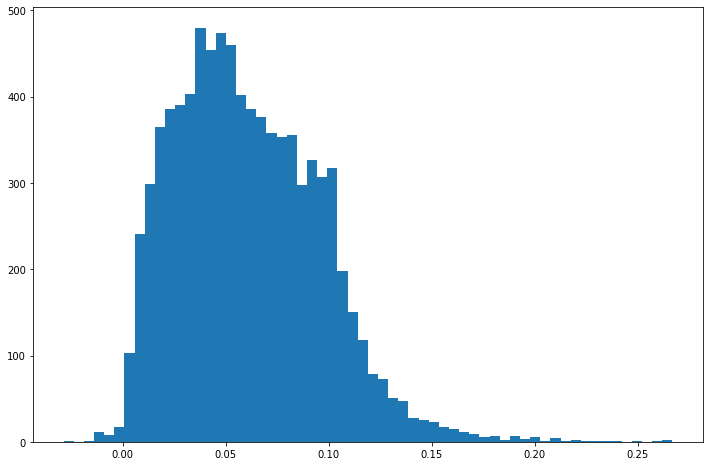

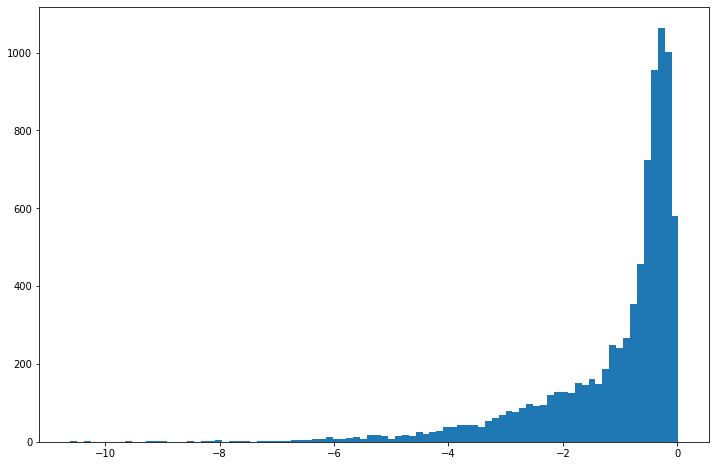

In [20]:
plt.figure(figsize=(12,8),facecolor='white')
plt.hist(d['E_f'][-1,:]-d['E_m'],bins='auto')
plt.show()
plt.figure(figsize=(12,8),facecolor='white')
plt.hist(d['dE_f'][-1,:]-d['dE_m'],bins='auto')
plt.show()

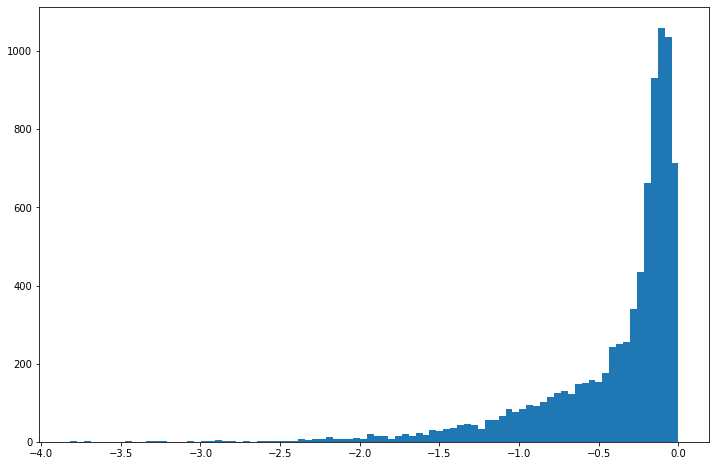

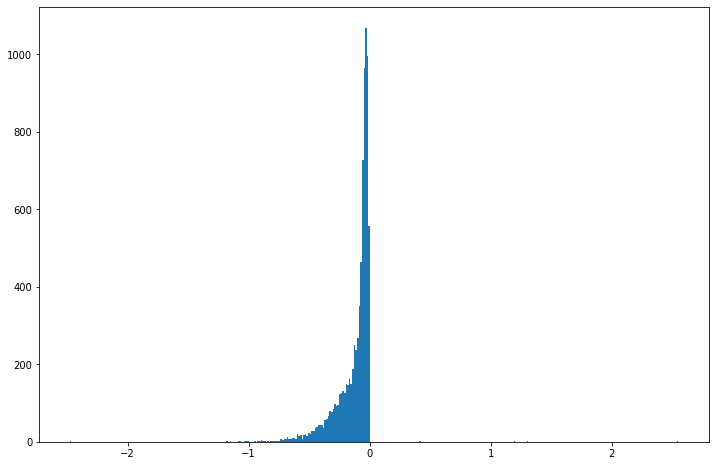

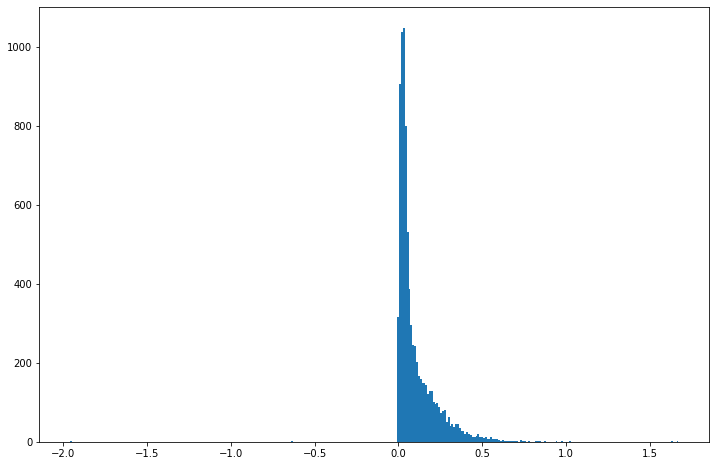

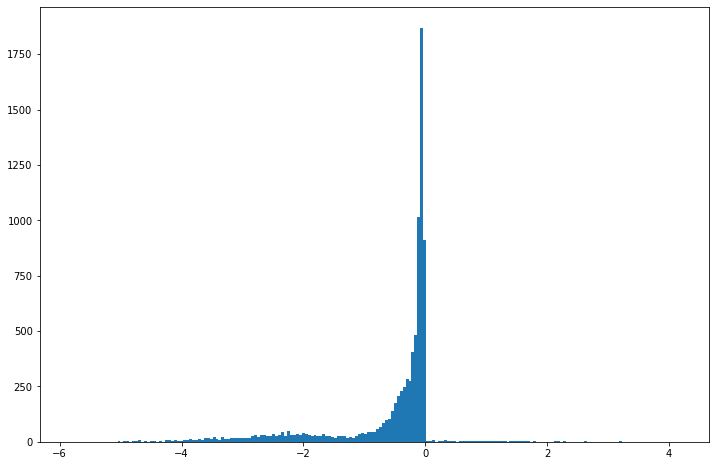

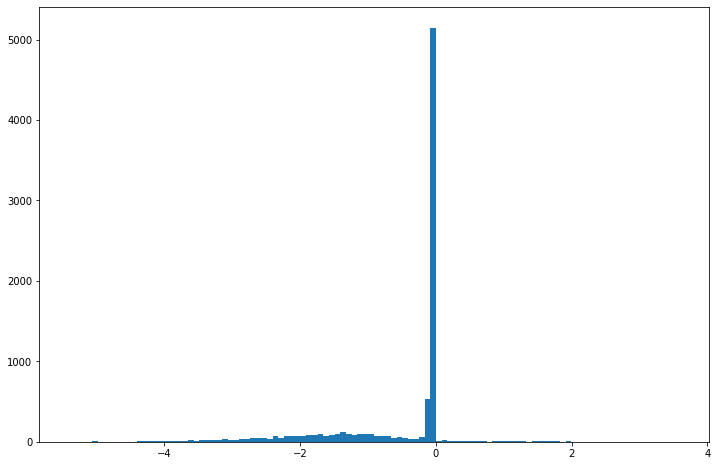

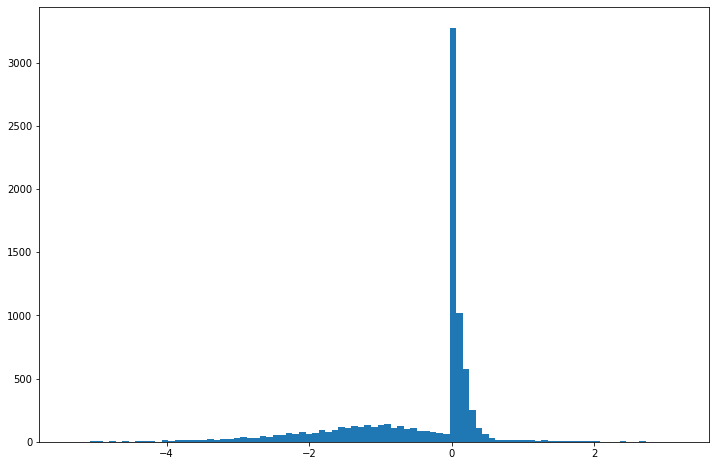

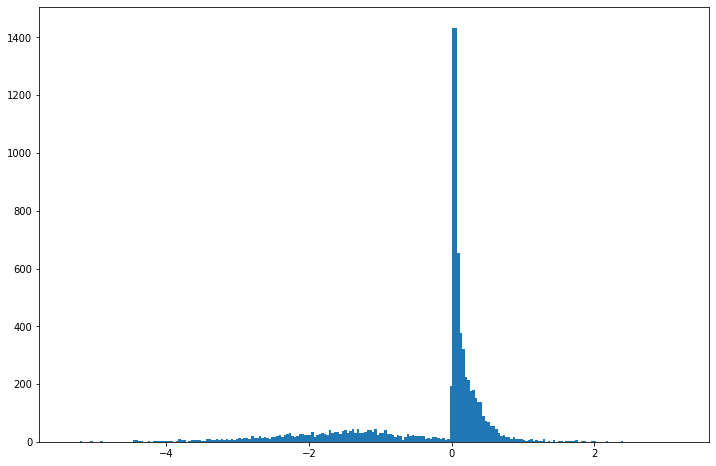

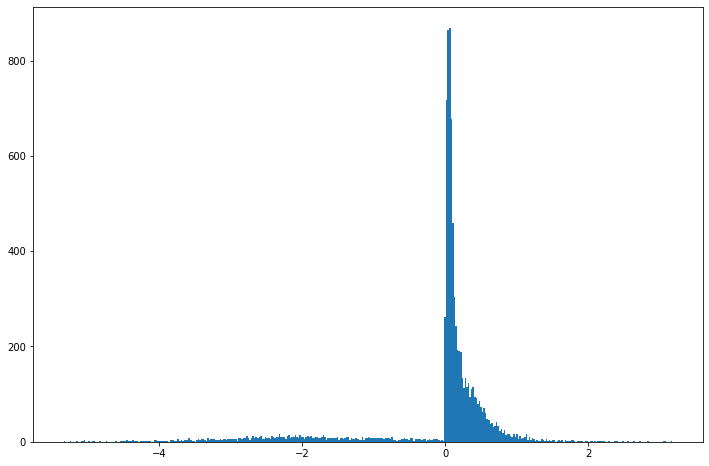

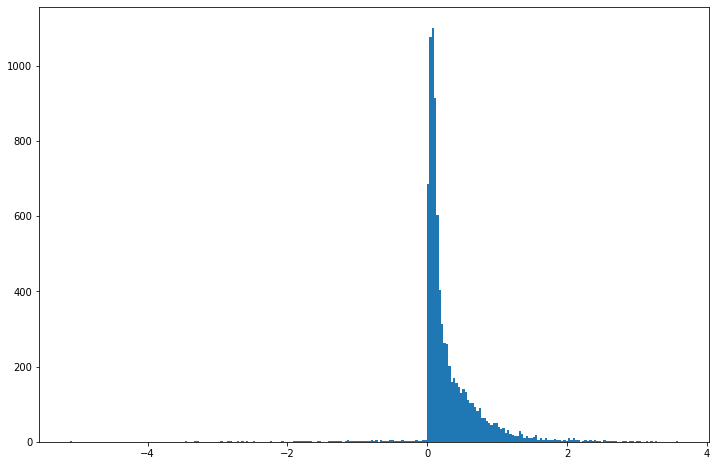

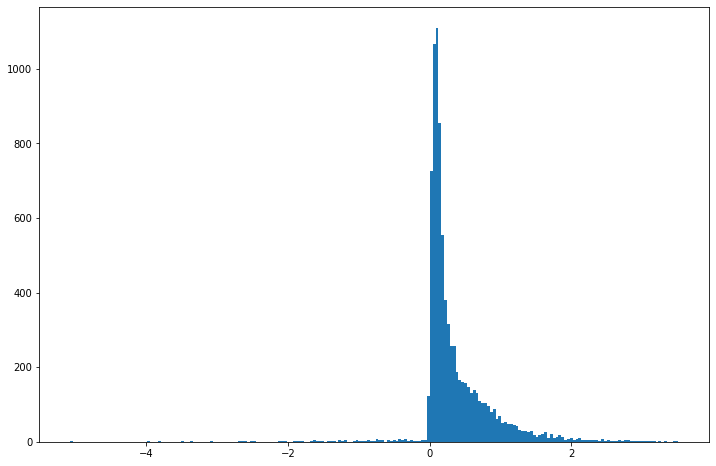

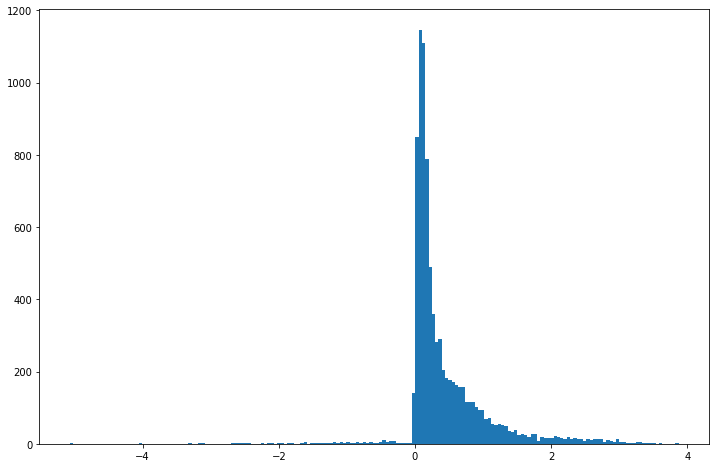

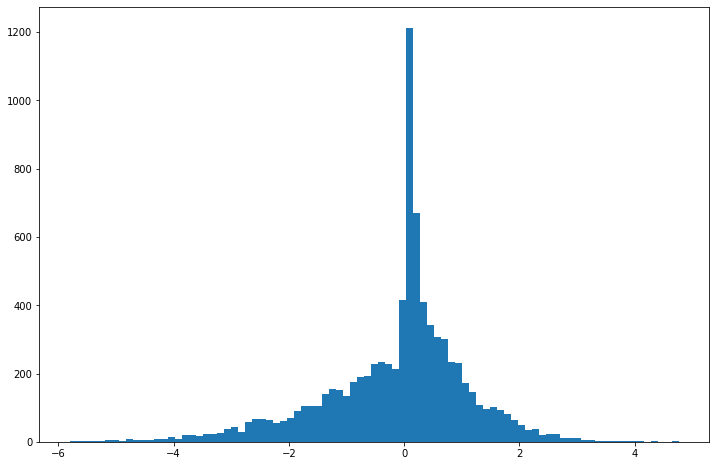

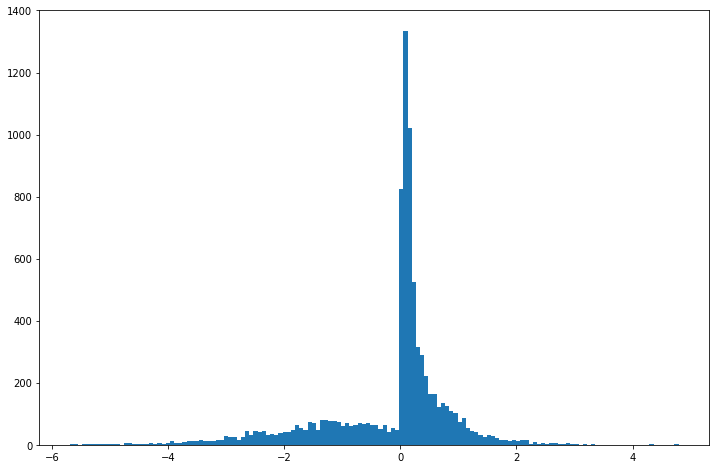

In [33]:
for i in range(13):
    plt.figure(figsize=(12,8),facecolor='white')
    plt.hist(d['dm'][:,i],bins='auto')
    plt.show()

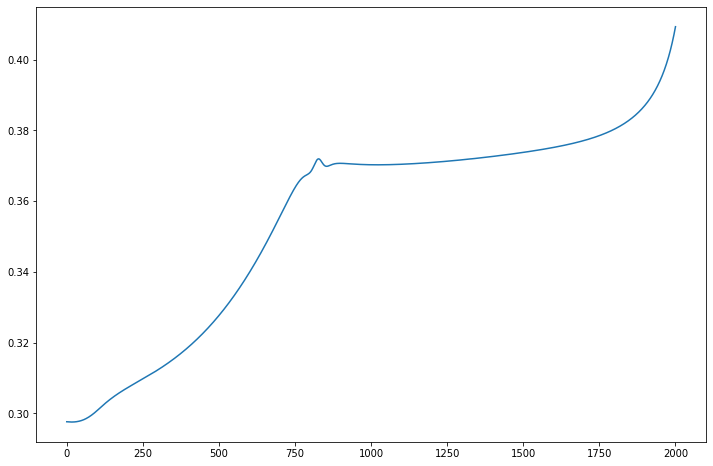

In [17]:
plt.figure(figsize=(12,8),facecolor='white')
for i in range(len(d['E_f'][-1,:])):
    plt.plot(range(l),d['E_f'][:,i])
    break
plt.show()

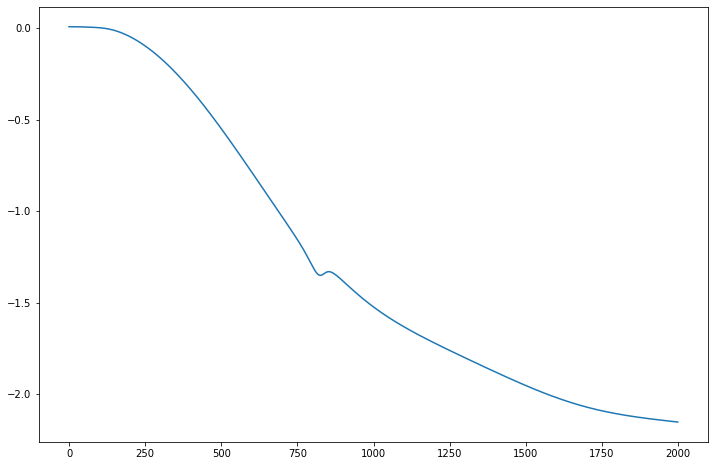

In [19]:
plt.figure(figsize=(12,8),facecolor='white')
for i in range(len(d['dE_f'][-1,:])):
    plt.plot(range(l-1),d['dE_f'][:,i])
    break
plt.show()

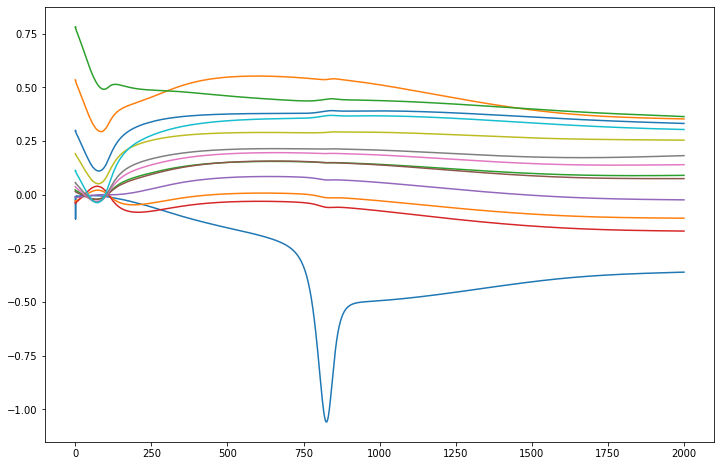

In [15]:
plt.figure(figsize=(12,8),facecolor='white')
for i in range(13):
    plt.plot(range(l),d['dR_f'][:,i])
plt.show()

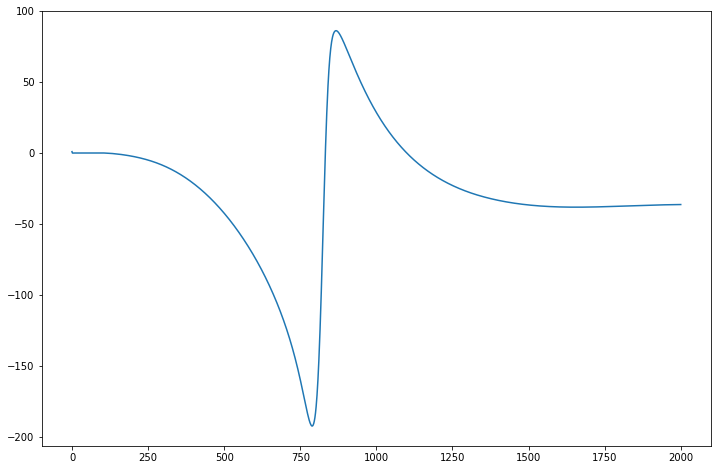

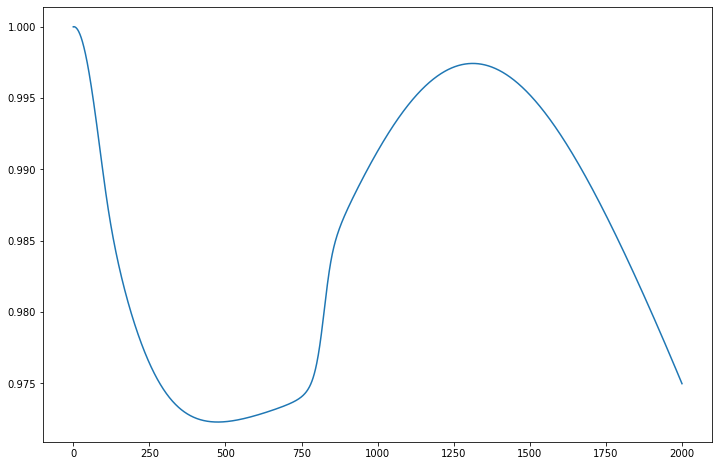

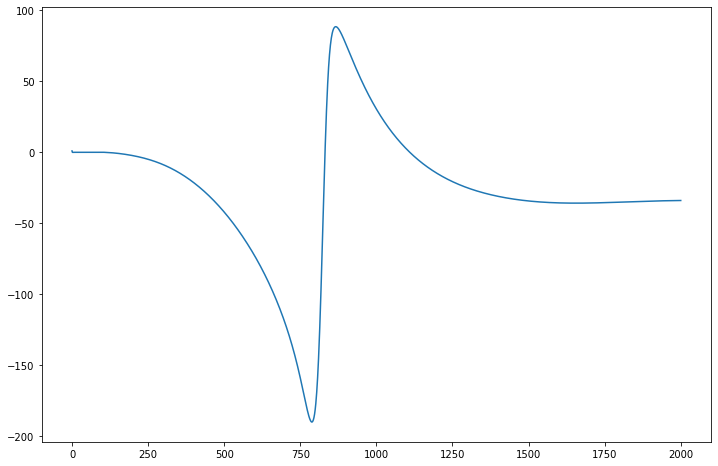

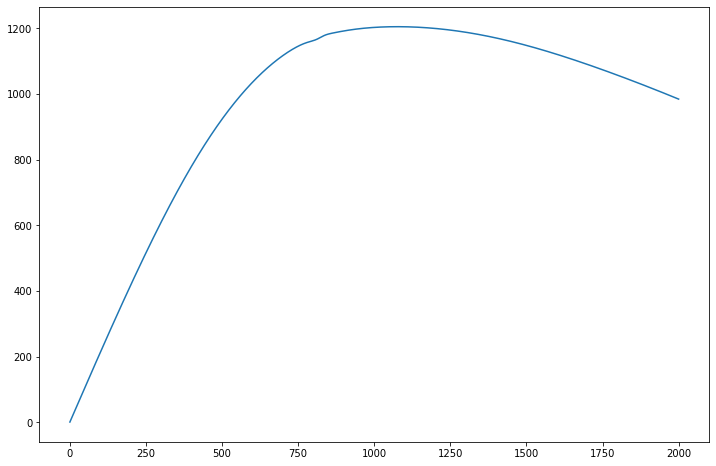

In [14]:
for la in lam:
    plt.figure(figsize=(12,8),facecolor='white')
    plt.plot(range(l),d['l'][la])
    plt.show()

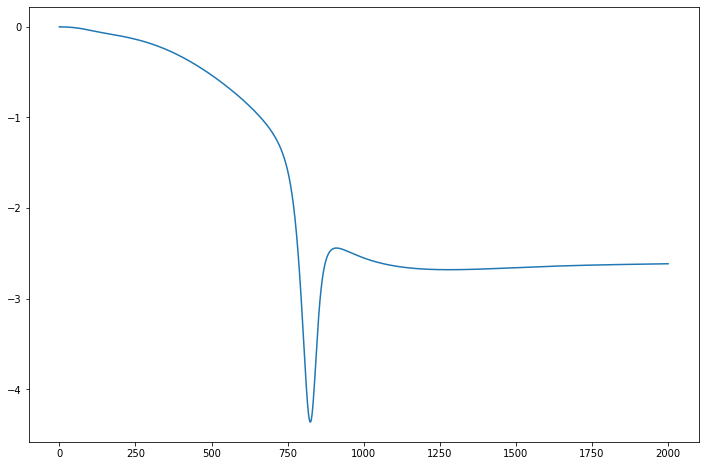

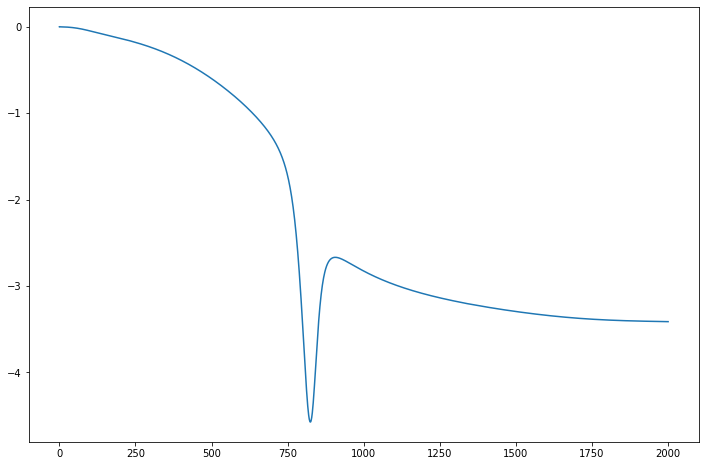

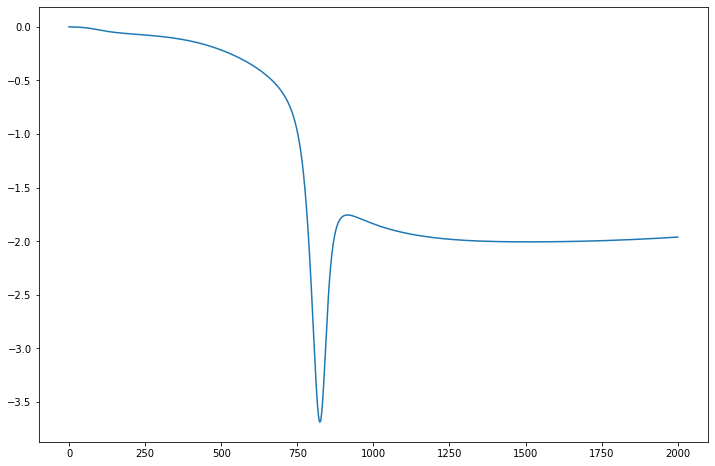

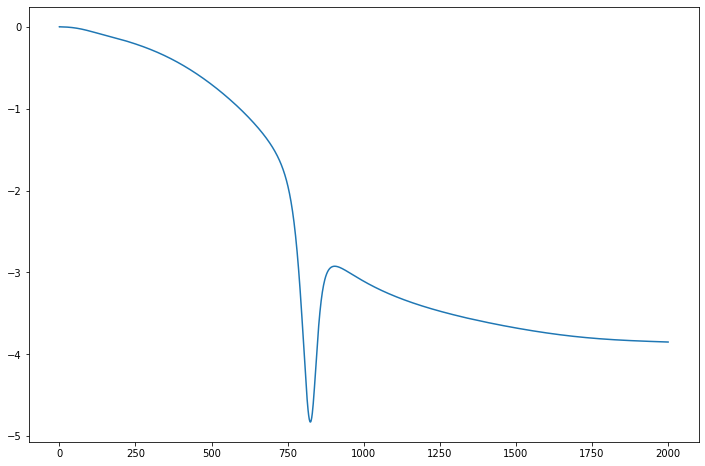

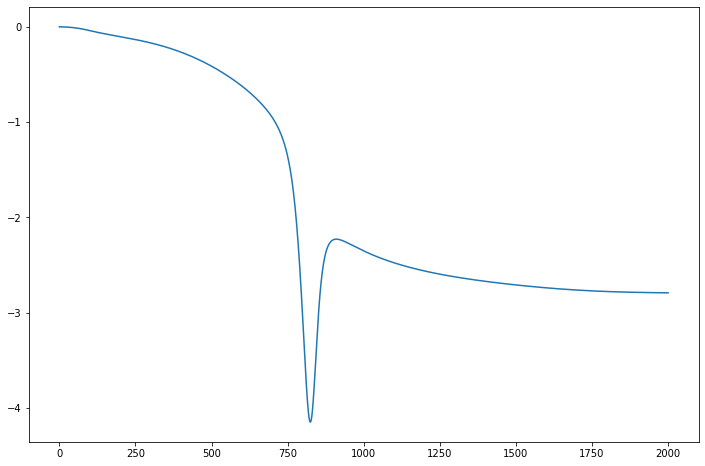

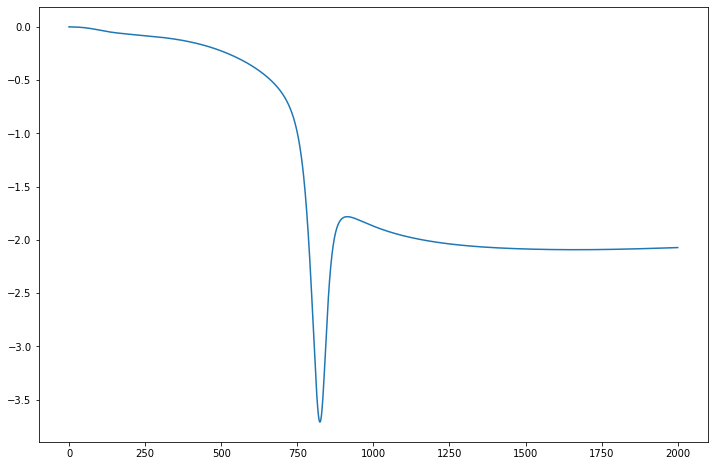

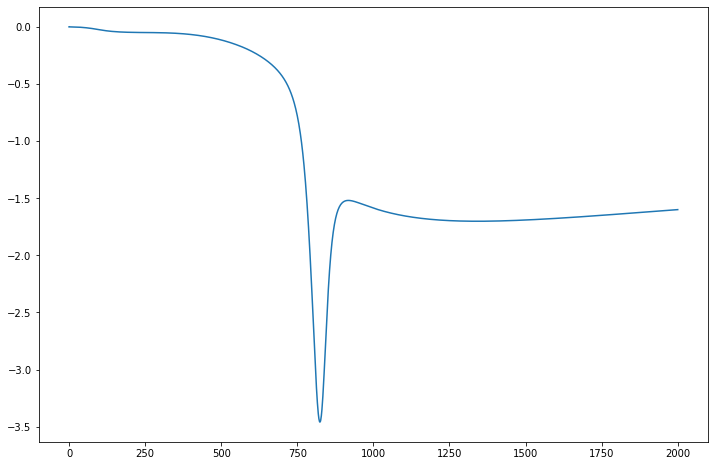

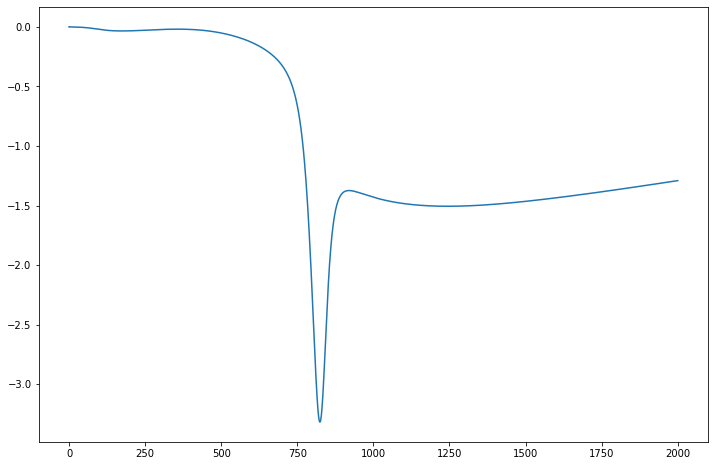

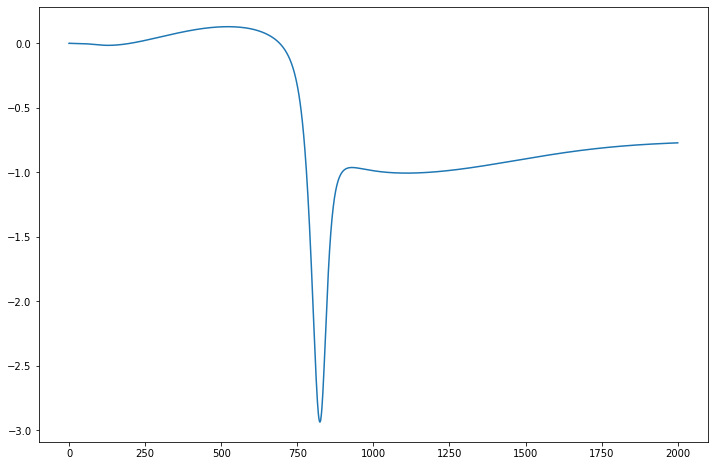

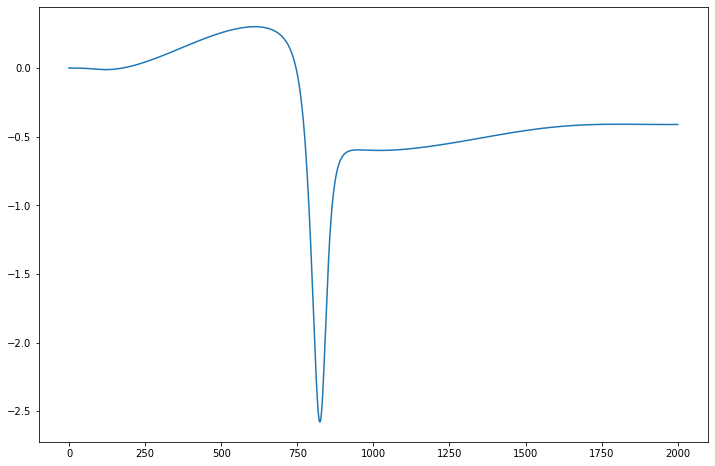

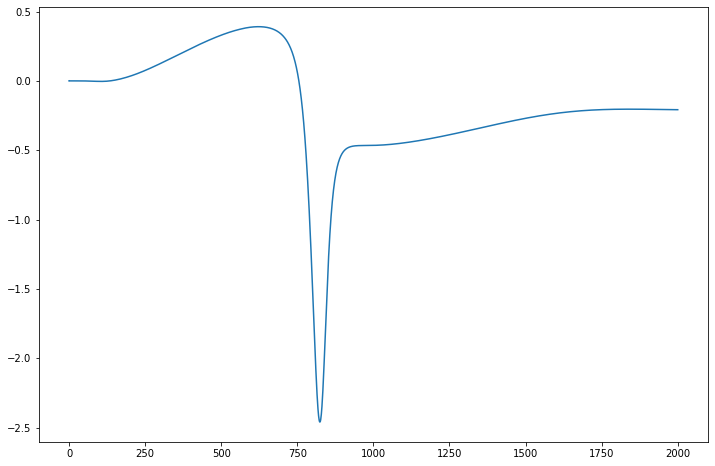

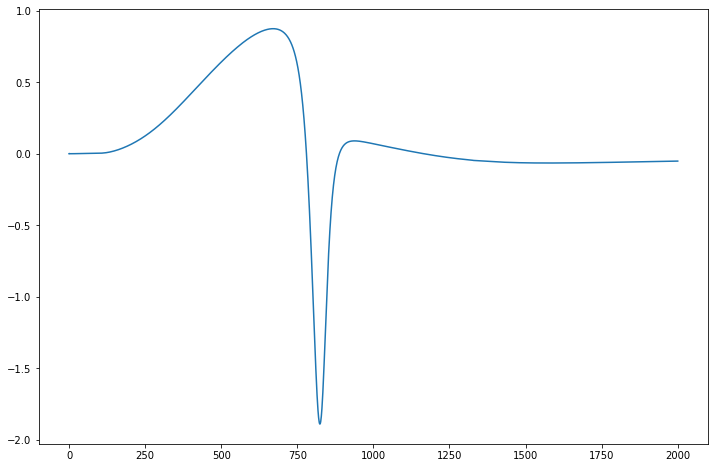

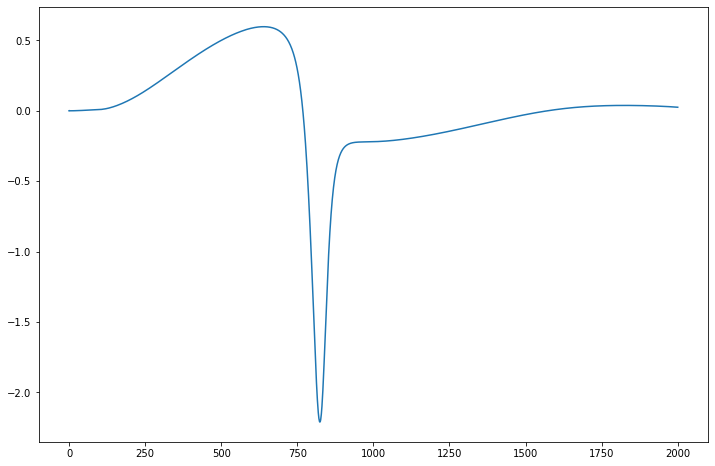

In [13]:
R_f = np.einsum('ij,nj->ni',B_inv,d['R_f'][:,:])
for i in range(13):
    plt.figure(figsize=(12,8),facecolor='white')
    plt.plot(range(l),R_f[:,i]-d['R_m'][None,i])
    plt.show()

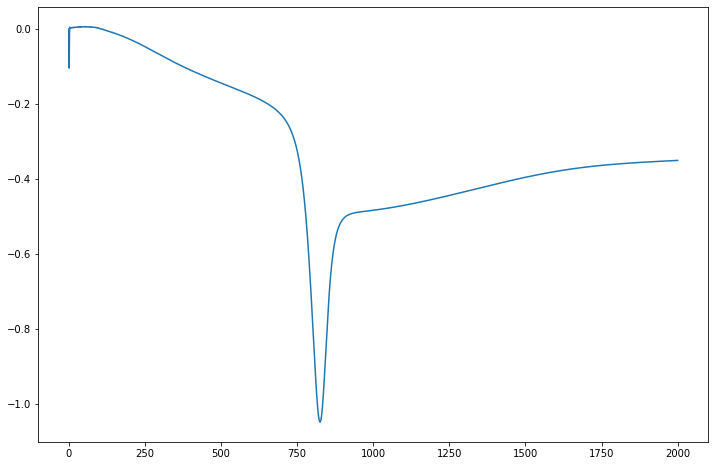

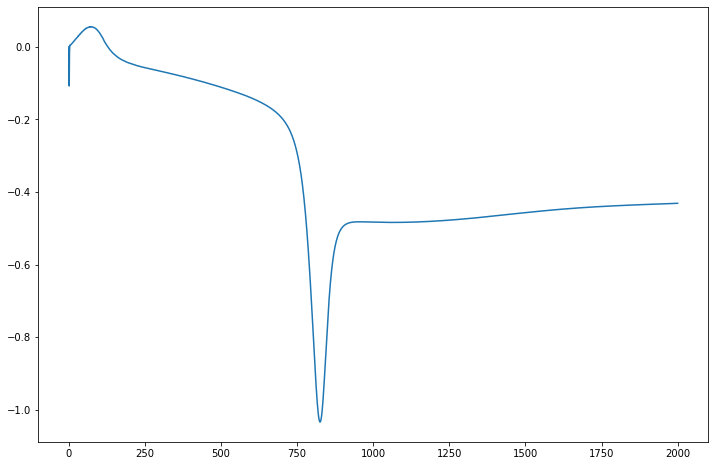

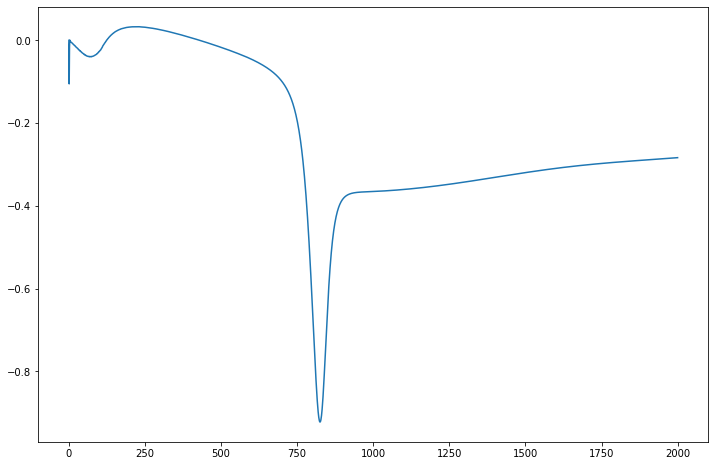

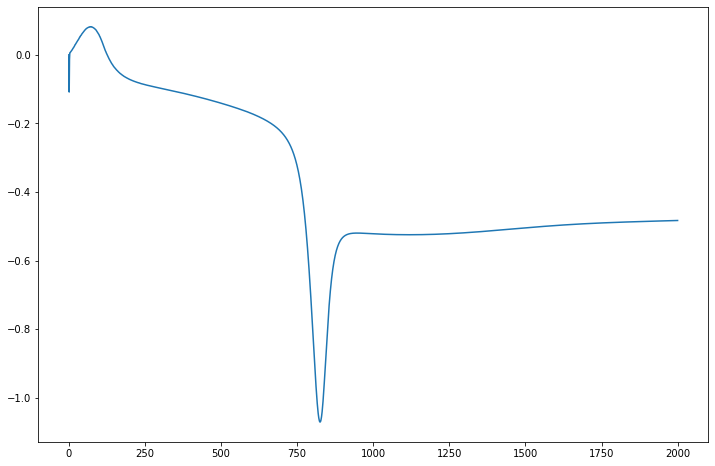

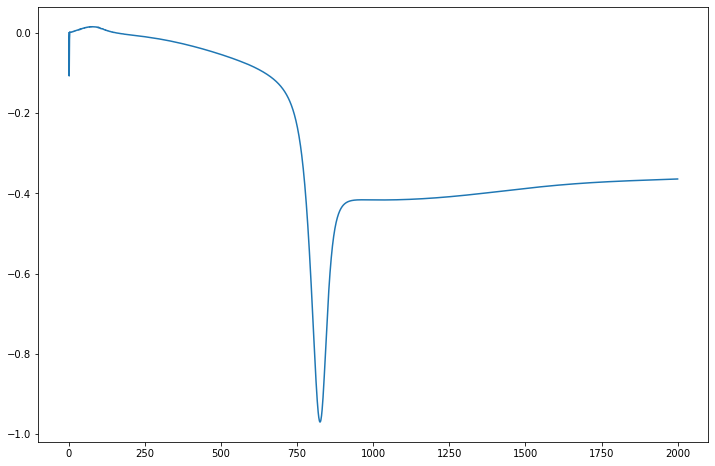

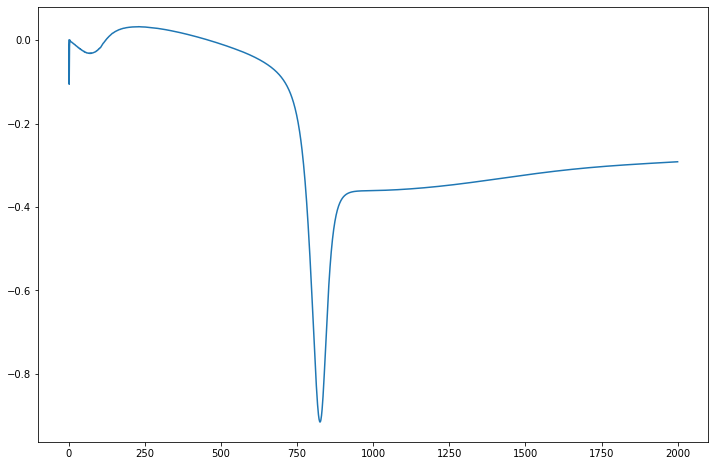

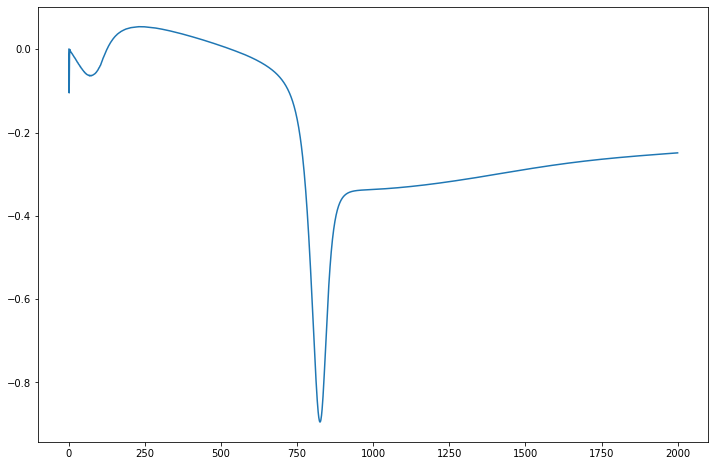

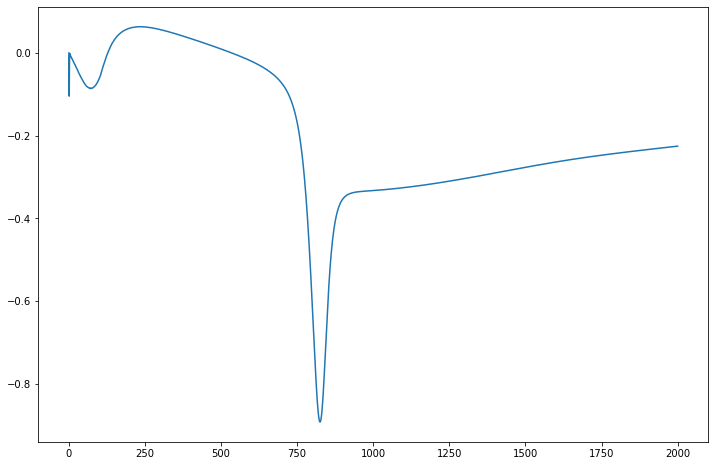

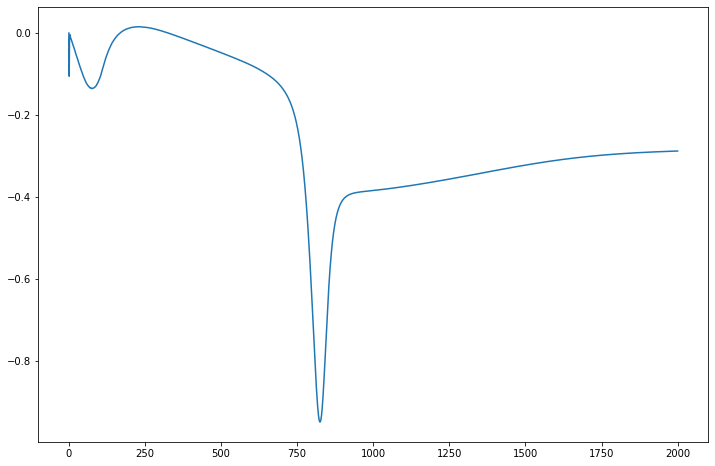

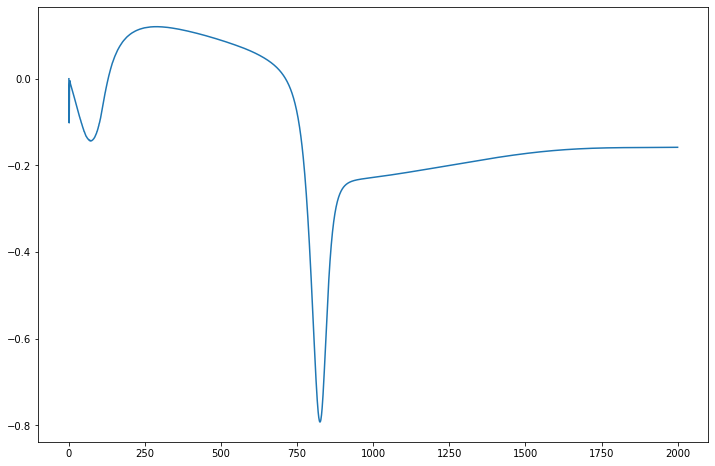

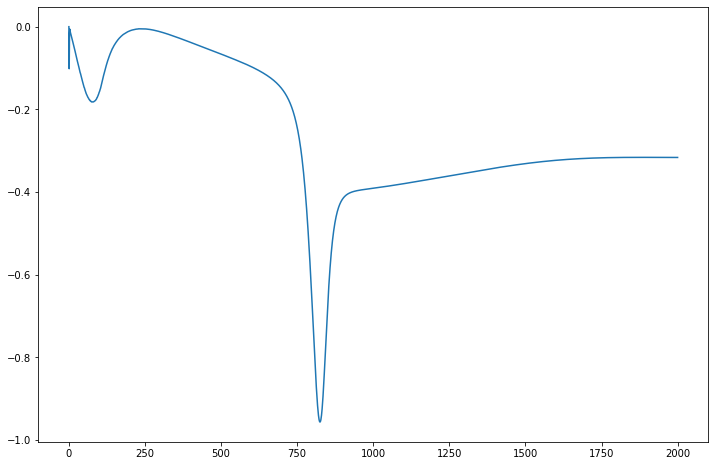

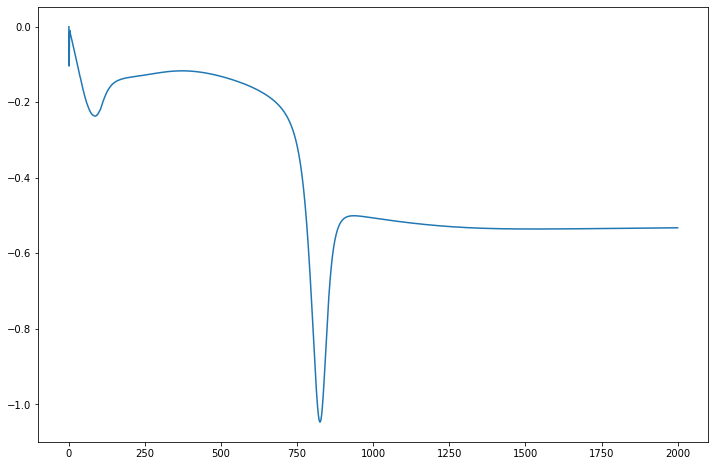

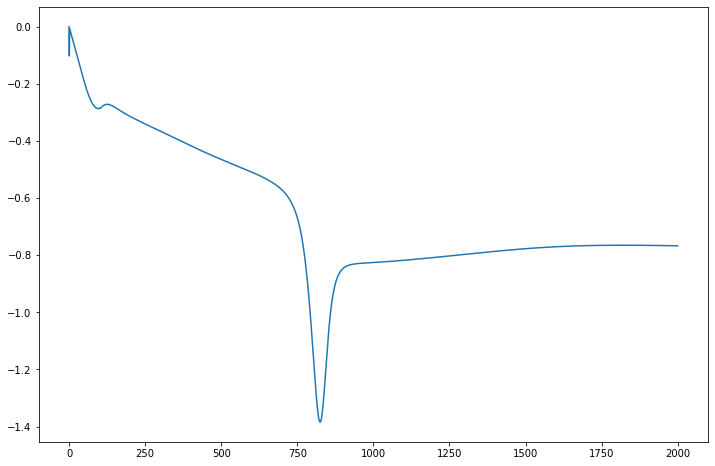

In [12]:
dR_f = np.einsum('ij,nj->ni',B_inv,d['dR_f'][:,:])
for i in range(13):
    plt.figure(figsize=(12,8),facecolor='white')
    plt.plot(range(l),dR_f[:,i]-d['dR_m'][None,i])
    plt.show()

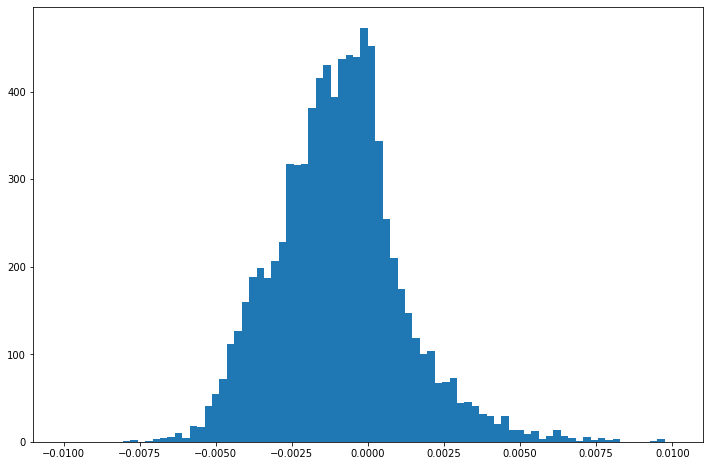

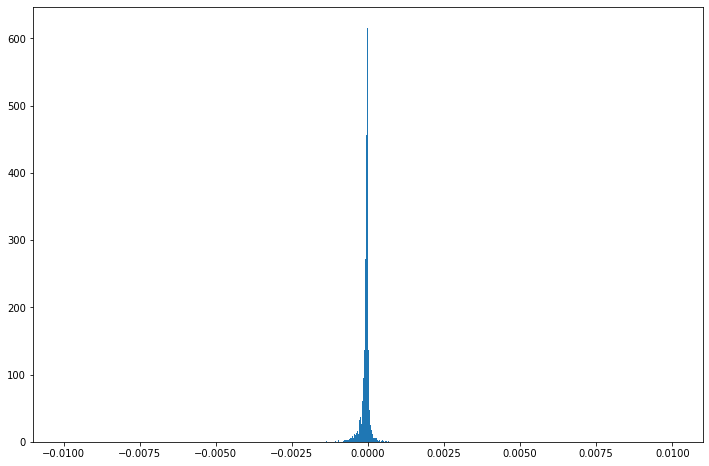

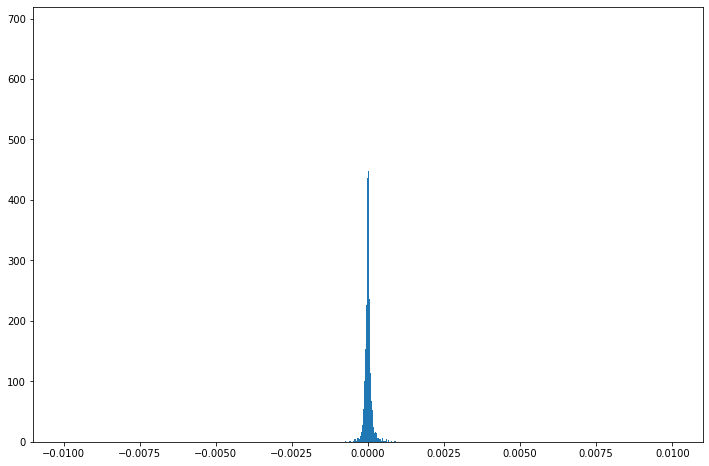

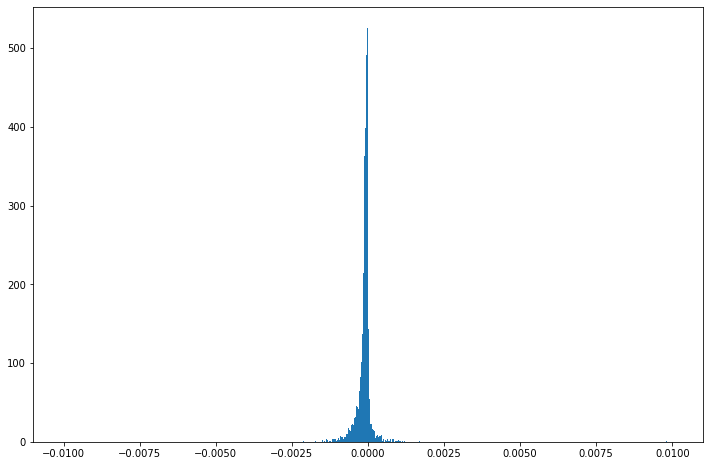

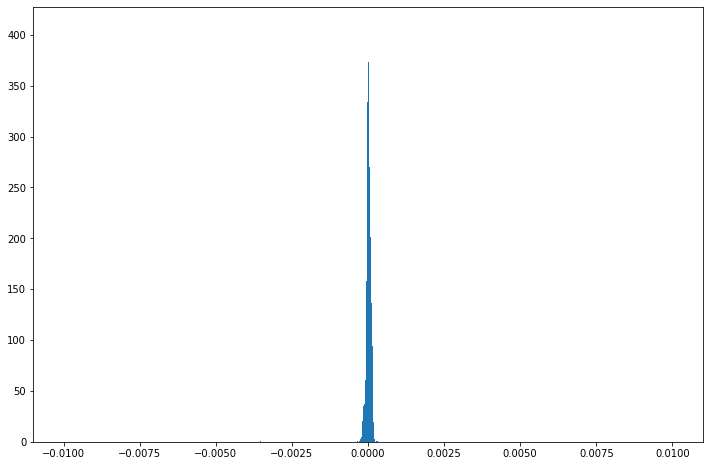

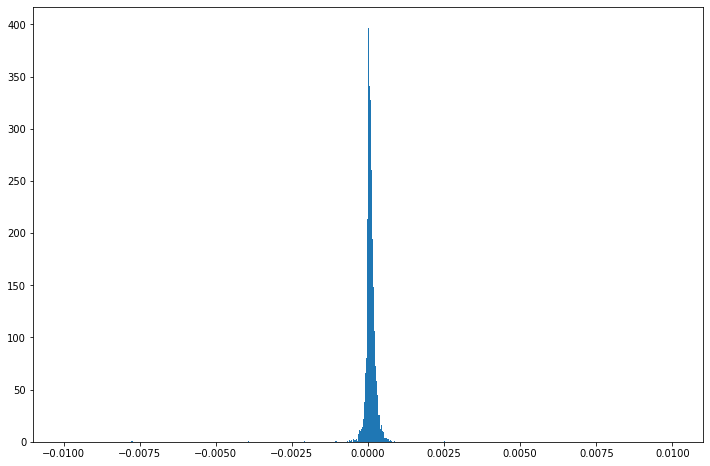

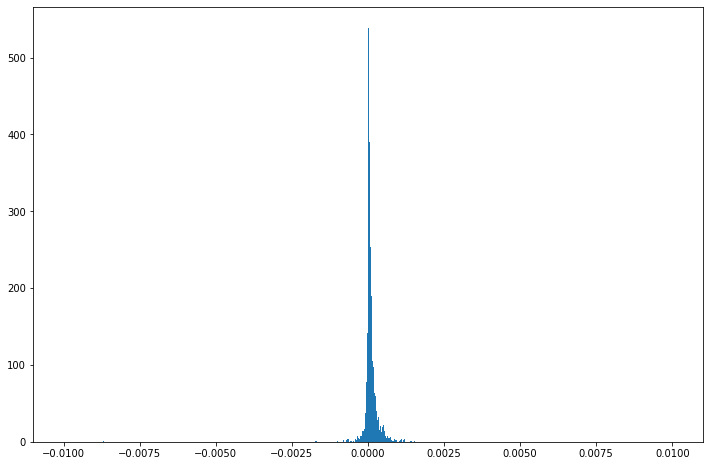

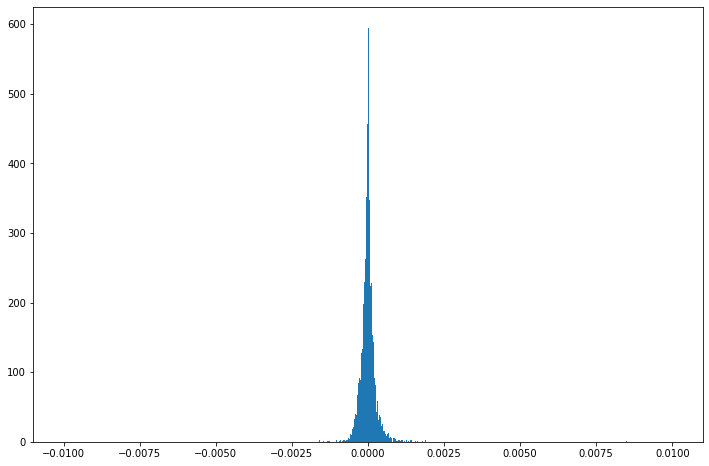

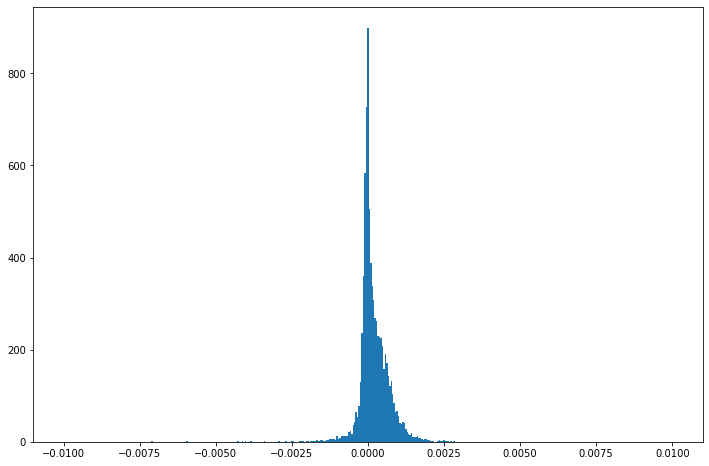

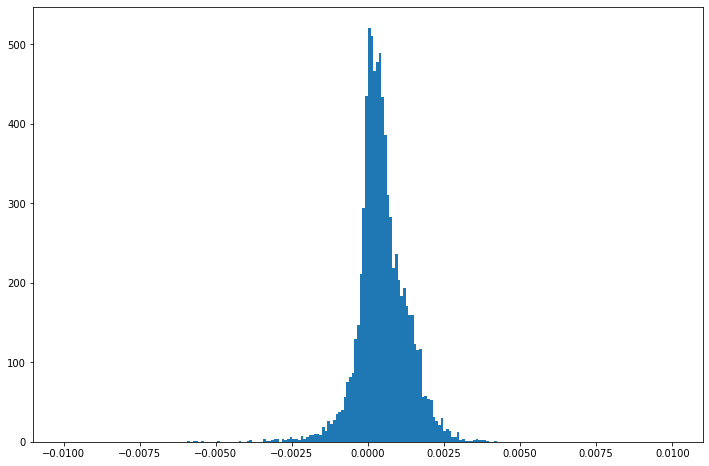

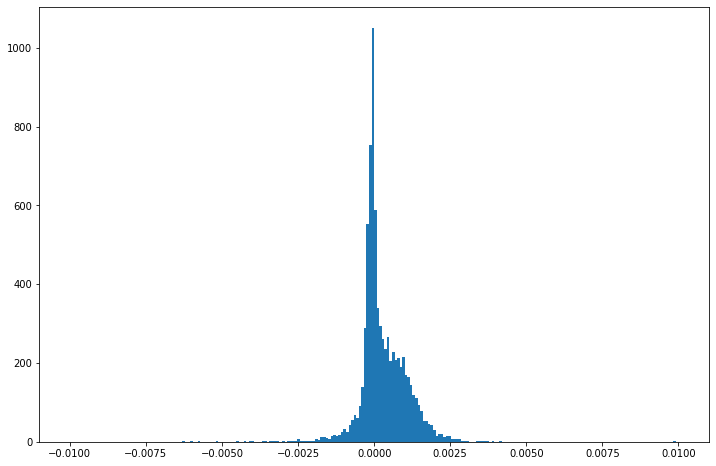

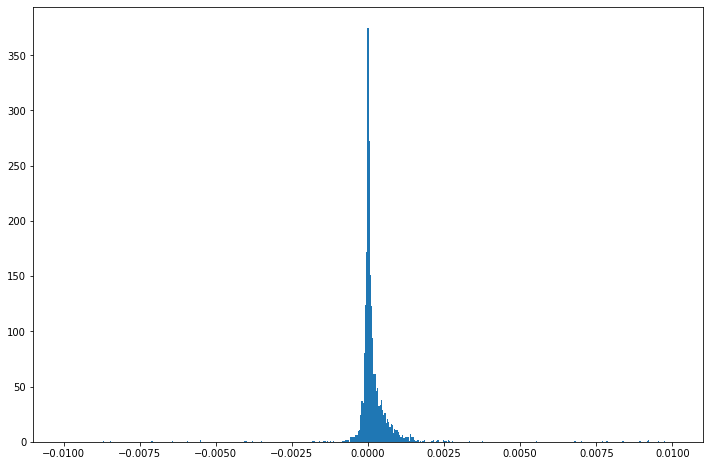

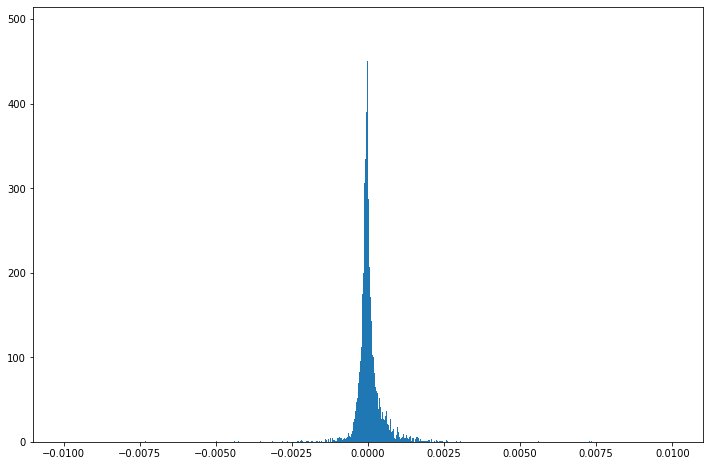

In [10]:
dm = d['dm'][None,:,:] + d['E_f'][-1,:,None]*d['R_f'][-1,None,:] + d['dE_f'][-1,:,None]*d['dR_f'][-1,None,:]
for i in range(13):
    plt.figure(figsize=(12,8),facecolor='white')
    plt.hist(dm[0,:,i],bins='auto', range=(-0.01,0.01))
    plt.show()